## Car brand Classification

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# import the libraries

from tensorflow.keras.layers import Input,Lambda,Flatten,Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [46]:
# resize all the images to this

IMAGE_SIZE = [224,224]

train_path = 'drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Train'
test_path = 'drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Test'

In [47]:
# import the ResNet50 library

inception = InceptionV3(input_shape = IMAGE_SIZE + [3],weights = 'imagenet',include_top = False)

In [48]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [49]:
# dont train existing weights

for layer in inception.layers:
    layer.trianable = False

In [50]:
# useful for getting no of output classes

folders = glob('drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Train/*')
folders

['drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Train/lamborghini',
 'drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Train/mercedes',
 'drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Train/audi']

In [51]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [52]:
prediction = Dense(len(folders),activation = 'softmax')(x)

#Create a model object
model = Model(inputs = inception.input,outputs = prediction)

In [53]:
# view the structure of the model

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [54]:
# Let model to know what cost and optimizer to use

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [55]:
# use the image data generator to import images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [56]:
# target size should be same as IMAGE_SIZE

training_set = train_datagen.flow_from_directory('drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [57]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [58]:
len(training_set)

2

In [59]:
len(test_set)

2

In [60]:
# fit the model
# Running the cell
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
2/2 [==============================] - 8s 2s/step - loss: 6.5741 - accuracy: 0.3542 - val_loss: 2.8331 - val_accuracy: 0.6379
Epoch 2/100
2/2 [==============================] - 1s 696ms/step - loss: 2.6651 - accuracy: 0.5729 - val_loss: 1.9505 - val_accuracy: 0.6897
Epoch 3/100
2/2 [==============================] - 1s 695ms/step - loss: 0.9228 - accuracy: 0.8542 - val_loss: 6.5020 - val_accuracy: 0.6034
Epoch 4/100
2/2 [==============================] - 1s 689ms/step - loss: 0.2117 - accuracy: 0.9375 - val_loss: 7.3314 - val_accuracy: 0.6552
Epoch 5/100
2/2 [==============================] - 1s 704ms/step - loss: 0.2186 - accuracy: 0.9271 - val_loss: 8.5690 - val_accuracy: 0.6034
Epoch 6/100
2/2 [==============================] - 1s 692ms/step - loss: 0.0682 - accuracy: 0.9792 - val_loss: 9.8754 - val_accuracy: 0.6034
Epoch 7/100
2/2 [==============================] - 1s 688ms/step - loss: 0.5546 - accuracy: 0.9062 - val_loss: 88.9981 - val_accuracy: 0.3276
Epoch 8/100
2/2

In [61]:
r.history

{'accuracy': [0.34375,
  0.578125,
  0.796875,
  0.9375,
  0.9375,
  0.984375,
  0.90625,
  0.953125,
  0.96875,
  0.96875,
  0.9375,
  0.90625,
  0.921875,
  1.0,
  0.96875,
  0.984375,
  0.96875,
  1.0,
  1.0,
  1.0,
  0.953125,
  1.0,
  0.9375,
  1.0,
  1.0,
  1.0,
  0.96875,
  1.0,
  0.984375,
  0.984375,
  1.0,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.984375,
  1.0,
  1.0,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  0.984375,
  1.0,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  0.984375,
  0.984375,
  1.0,
  1.0,
  0.96875,
  1.0,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.984375,
  1.0,
  1.0],
 'loss': [9.283074378967285,
  2.653024196624756,
  1.2791306972503662,
  0.19112171232700348,
  0.18744897842407227,
  0.05185754597187042,
  0

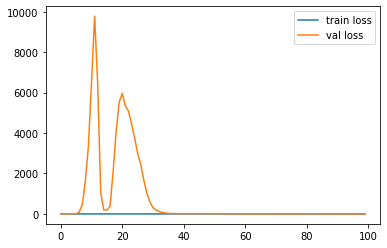

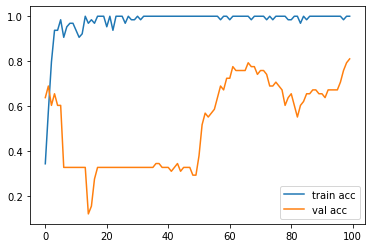

<Figure size 432x288 with 0 Axes>

In [62]:
# plot the loss

plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()
plt.savefig('drive/MyDrive/projects/Deep-Learning-Car-Brand-master/LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('drive/MyDrive/projects/Deep-Learning-Car-Brand-master/AccVal_acc')

In [63]:
# save it as h5 file
from tensorflow.keras.models import load_model
model.save('drive/MyDrive/projects/Deep-Learning-Car-Brand-master/model_incetpionV3.h5')

In [64]:
y_pred = model.predict(test_set)

In [65]:
y_pred

array([[3.97414617e-08, 9.99999881e-01, 1.50173790e-07],
       [4.76977613e-04, 3.67532611e-01, 6.31990433e-01],
       [3.77379648e-18, 1.00000000e+00, 2.01423037e-15],
       [2.72955893e-13, 5.45510733e-15, 1.00000000e+00],
       [1.02330945e-04, 9.96149302e-01, 3.74833355e-03],
       [1.87144667e-17, 1.00000000e+00, 3.41147500e-14],
       [8.29374671e-01, 1.07580107e-02, 1.59867242e-01],
       [1.07850465e-10, 1.00000000e+00, 1.13153642e-09],
       [6.85513479e-10, 1.00000000e+00, 1.67702741e-08],
       [5.97076491e-04, 9.92831826e-01, 6.57101301e-03],
       [3.32308589e-29, 1.00000000e+00, 1.85821046e-22],
       [5.78031802e-07, 9.55961823e-01, 4.40376401e-02],
       [5.50282180e-01, 7.96591304e-03, 4.41751927e-01],
       [9.48084458e-11, 2.96839342e-14, 1.00000000e+00],
       [9.99832034e-01, 1.92445586e-05, 1.48766951e-04],
       [9.99953628e-01, 2.79845676e-06, 4.36533337e-05],
       [3.62423540e-04, 4.64866680e-05, 9.99591053e-01],
       [1.12410038e-12, 1.00000

In [66]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [67]:
y_pred

array([1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2])

In [68]:
img=image.load_img('drive/MyDrive/projects/Deep-Learning-Car-Brand-master/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

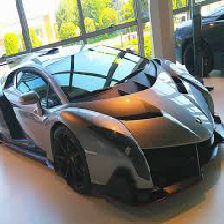

In [69]:
img

In [70]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [71]:
x.shape

(224, 224, 3)

In [72]:
x=x/255

In [73]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [74]:
model.predict(img_data)

array([[0., 0., 1.]], dtype=float32)

In [75]:
a=np.argmax(model.predict(img_data), axis=1)

In [76]:
a==1

array([False])

In [77]:
a

array([2])